# Velocity and Acceleration of a point of a rigid body
Renato Naville Watanabe

As already previously seen, the description of the position of a point P of a rotating rigid body is given by:

$${\bf\vec{r}_{P/O}} = x_{P/O}^*{\bf\hat{i}'} + y_{P/O}^*{\bf\hat{j}'}= R(\theta)\left[\begin{array}{c}x_{P/O}^*\\y_{P/O}^* \end{array}\right]$$

where $x_{P/O}^*$ and $y_{P/O}^*$ is the P position at the reference state, $R(\theta)$ is the rotation matrix $R(\theta) = \left[\begin{array}{cc}\cos(\theta)&-\sin(\theta)\\\sin(\theta)&\cos(\theta) \end{array}\right]$, ${\bf\hat{i}'} = \cos(\theta){\bf\hat{i}}+\sin(\theta){\bf\hat{j}}$ and ${\bf\hat{j}'} = -\sin(\theta){\bf\hat{i}}+\cos(\theta){\bf\hat{j}}$

<img src="../images/rotBody.png" width=1000/>

Below is an example of a rigid body rotating 60 degrees.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [3]:
theta = np.pi/3
phi = np.linspace(0,2*np.pi,100)
R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

In [4]:
B = np.squeeze(np.array([[2*np.cos(phi)],[6*np.sin(phi)]]))

In [5]:
BRot = R@B

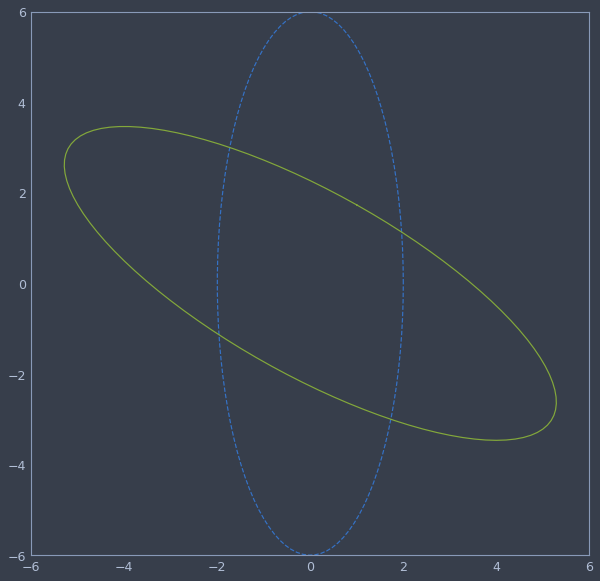

In [6]:
plt.rcParams['figure.figsize']=10,10
plt.figure()
plt.plot(B[0,:],B[1,:],'--',BRot[0,:],BRot[1,:])
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.grid()
plt.show()

## Translation of a rigid body

 Let's consider now the case in which, besides a rotation, a translation of the body happens. This situation is represented in the figure below. In this case, the position of the point P is given by:
 
 $${\bf\vec{r}_{P/O}} = {\bf\vec{r}_{A/O}}+{\bf\vec{r}_{P/A}}= {\bf\vec{r}_{A/O}}+x_{P/A}^*{\bf\hat{i}'} + y_{P/A}^*{\bf\hat{j}'} = {\bf\vec{r}_{A/O}}+R(\theta)\left[\begin{array}{c}x_{P/O}^*\\y_{P/O}^* \end{array}\right]$$

<img src="../images/rotTrBody.png" width=1000/>

## Transformation matrix

The expression of the translation can be written in a more compact form, by using what is known  as Transformation Matrix. The expression of the translation can be written as below:

$$\left[\begin{array}{c}x_{P/O}\\y_{P/O} \end{array}\right] = \left[\begin{array}{c}x_{A/O}\\y_{A/O} \end{array}\right]+\left[\begin{array}{cc}\cos(\theta)&-\sin(\theta)\\\sin(\theta)&\cos(\theta) \end{array}\right].\left[\begin{array}{c}x_{P/A}^*\\y_{P/A}^* \end{array}\right]$$

This equation can be written  using a single matrix by adding a third element, equal to one, to the position vectors. This third element has  no  physical  meaning. It is added as an auxiliary to the computation. With this third element added, the equation above can be written as:

$$\left[\begin{array}{c}x_{P/O}\\y_{P/O}\\1 \end{array}\right] = \left[\begin{array}{ccc}\cos(\theta)&-\sin(\theta)&x_{A/O}\\\sin(\theta)&\cos(\theta)&y_{A/O}\\0&0&1 \end{array}\right].\left[\begin{array}{c}x_{P/A}^*\\y_{P/A}^*\\1 \end{array}\right]$$

The matrix on the equation above is known as Transformation Matrix. Note that it includes the information from both the rotation and the translation of the body.

Below is an example of the same rigid body that translates in both directions (7 m in x direction and 10 m in y direction), besides the 60 degrees rotation.


In [7]:
roa = np.array([[7],[10]])

In [8]:
T = np.vstack((np.hstack((R,roa)), np.array([0,0,1])))
T

array([[  0.5      ,  -0.8660254,   7.       ],
       [  0.8660254,   0.5      ,  10.       ],
       [  0.       ,   0.       ,   1.       ]])

In [9]:
Baum = np.vstack((B,np.ones((1,np.shape(B)[1]))))
BRotTr = T@Baum

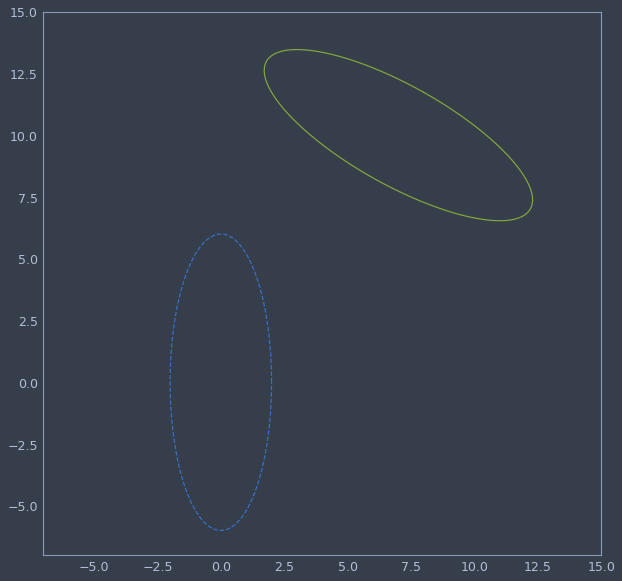

In [10]:
plt.figure()
plt.plot(B[0,:],B[1,:],'--',BRotTr[0,:],BRotTr[1,:])
plt.xlim((-7,15))
plt.ylim((-7,15))
plt.grid()
plt.show()

## Velocity of a point

First we will consider the situation with no translation. The velocity of the point P is given by:

$${\bf\vec{v}_{P/O}} = \frac{d{\bf\vec{r}_{P/O}}}{dt} = \frac{d(x_{P/O}^*{\bf\hat{i}'} + y_{P/O}^*{\bf\hat{j}'})}{dt}$$

To continue this deduction, we have to find the expression of the derivatives of ${\bf\hat{i}'}$ and ${\bf\hat{j}'}$. This is very similar to the derivative expressions of ${\bf\hat{e_R}}$ and  ${\bf\hat{e_\theta}}$ of polar coordinates.

$$\frac{d{\bf\hat{i}'}}{dt} = -\dot{\theta}\sin(\theta){\bf\hat{i}}+\dot{\theta}\cos(\theta){\bf\hat{j}} = \dot{\theta}{\bf\hat{j}'}$$

$$\frac{d{\bf\hat{j}'}}{dt} = -\dot{\theta}\cos(\theta){\bf\hat{i}}-\dot{\theta}\sin(\theta){\bf\hat{j}} = -\dot{\theta}{\bf\hat{i}'}$$

Another way to represent the expressions above is by using the vector form to express the angular velocity $\dot{\theta}$. It is usual to represent the angular velocity as a vector in the direction ${\bf\hat{k}}$: ${\bf\vec{\omega}} = \dot{\theta}{\bf\hat{k}}$. Using this definition of the angular velocity, we can write the above expressions as:

$$\frac{d{\bf\hat{i}'}}{dt} = \dot{\theta}{\bf\hat{j}'} = {\bf\vec{\omega}} \times {\bf\hat{i}'} = \dot{\theta} {\bf\hat{k}}\times {\bf\hat{i}'}$$

$$\frac{d{\bf\hat{j}'}}{dt} = -\dot{\theta}{\bf\hat{i}'}={\bf\vec{\omega}} \times {\bf\hat{j}'} = \dot{\theta} {\bf\hat{k}}\times {\bf\hat{j}'}$$

So, the velocity of the point P in the situation of no translation is:

$${\bf\vec{v}_{P/O}} = \frac{d(x_{P/O}^*{\bf\hat{i}'} + y_{P/O}^*{\bf\hat{j}'})}{dt} = x_{P/O}^*\frac{d{\bf\hat{i}'}}{dt} + y_{P/O}^*\frac{d{\bf\hat{j}'}}{dt}=x_{P/O}^*{\bf\vec{\omega}} \times {\bf\hat{i}'} + y_{P/O}^*{\bf\vec{\omega}} \times {\bf\hat{j}'} = {\bf\vec{\omega}} \times (x_{P/O}^*{\bf\hat{i}'}) + {\bf\vec{\omega}} \times (y_{P/O}^*{\bf\hat{j}'}) ={\bf\vec{\omega}} \times (x_{P/O}^*{\bf\hat{i}'}+y_{P/O}^*{\bf\hat{j}'}) = {\bf\vec{\omega}} \times {\bf{\vec{r}_{P/O}}}  $$


## Relative velocity of a point on a rigid body to another point

To compute the velocity of a point on a rigid body that is translating, we need to find the expression of the velocity of a point (P) in relation to another point on the body (A). So:

$${\bf\vec{v}_{P/A}} = {\bf\vec{v}_{P/O}}-{\bf\vec{v}_{A/O}} = {\bf\vec{\omega}} \times {\bf{\vec{r}_{P/O}}} - {\bf\vec{\omega}} \times {\bf{\vec{r}_{A/O}}} = {\bf\vec{\omega}} \times ({\bf{\vec{r}_{P/O}}}-{\bf{\vec{r}_{A/O}}}) =  {\bf\vec{\omega}} \times {\bf{\vec{r}_{P/A}}}$$



## Velocity of a point on rigid body translating

The velocity of a point on a rigid body that is translating is given by:

$${\bf\vec{v}_{P/O}}  = \frac{d{\bf\vec{r}_{P/O}}}{dt} = \frac{d({\bf\vec{r}_{A/O}}+x_{P/A}^*{\bf\hat{i}'} + y_{P/A}^*{\bf\hat{j}'})}{dt} = \frac{d{\bf\vec{r}_{A/O}}}{dt}+\frac{d(x_{P/A}^*{\bf\hat{i}'} + y_{P/A}^*{\bf\hat{j}'})}{dt} = {\bf\vec{v}_{A/O}} + {\bf\vec{\omega}} \times {\bf{\vec{r}_{P/A}}}$$

Below is an example of a body rotating with the angular velocity of $\omega = \pi/10$ rad/s and translating at the velocity of ${\bf\vec{v}} = 0.7 {\bf\hat{i}} + 0.5 {\bf\hat{j}}$ m/s. The red arrow indicates the velocity of the geometric center of the body and the blue arrow indicates the velocity of the lower point of the body

<IPython.core.display.Javascript object>


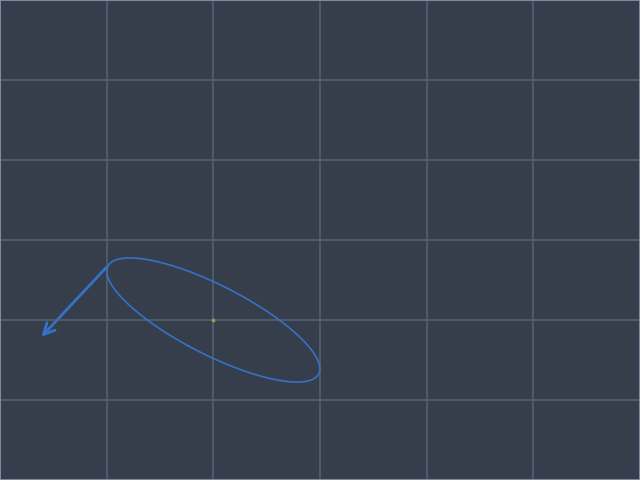

In [11]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from matplotlib.patches import FancyArrowPatch
t = np.linspace(0,13,10)
omega = np.pi/10 #[rad/s]
voa = np.array([[0],[0]])
fig = plt.figure()
plt.grid()
ax = fig.add_axes([0, 0, 1, 1])    
ax.axis("on")
plt.rcParams['figure.figsize']=5,5
def run(i):
    theta = omega * t[i]
    
    roa = voa * t[i]
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    T = np.vstack((np.hstack((R,roa)), np.array([0,0,1])))
    BRot = R@B
    BRotTr = T@Baum   
    
    
    
    plt.plot(BRotTr[0,:],BRotTr[1,:], roa[0], roa[1],'.', hold = False)
    vVoa = FancyArrowPatch(np.array([float(roa[0]), float(roa[1])]), 
                           np.array([float(roa[0]+voa[0]), 
                                       float(roa[1]+voa[1])]), mutation_scale=20, 
                           lw=2, arrowstyle="->", color="r", alpha=1)
    ax.add_artist(vVoa)
    
    
    
    element = 75
    Vp = 3*np.array([voa[0]-omega*BRot[1,element], voa[1]+omega*BRot[0,element]])
    vVP = FancyArrowPatch(np.array([float(BRotTr[0,element]), float(BRotTr[1,element])]), 
                          np.array([float(BRotTr[0,element]+Vp[0]), 
                                      float(BRotTr[1,element]+Vp[1])]),
                          mutation_scale=20, 
                          lw=2, arrowstyle="->", color="b", alpha=1)
    ax.add_artist(vVP)
    
    plt.xlim((-10, 20))
    plt.ylim((-10, 20))
       
    

ani = FuncAnimation(fig, run, frames = 50,repeat=False,  interval =500)
plt.show()


## Acceleration of  a point on a rigid body

The acceleration of a point on a rigid body is obtained by deriving the previous expression:

$${\bf\vec{a}_{P/O}} = {\bf\vec{a}_{A/O}} + \dot{\bf\vec{\omega}} \times {\bf{\vec{r}_{P/A}}} + {\bf\vec{\omega}} \times {\bf{\vec{v}_{P/A}}} = {\bf\vec{a}_{A/O}} + \dot{\bf\vec{\omega}} \times {\bf{\vec{r}_{P/A}}} + {\bf\vec{\omega}} \times ({\bf\vec{\omega}} \times {\bf{\vec{r}_{P/A}}}) = {\bf\vec{a}_{A/O}} + \ddot{\theta}\bf\hat{k} \times {\bf{\vec{r}_{P/A}}} - \dot{\theta}^2{\bf{\vec{r}_{P/A}}}$$

Below is an example of a rigid  body with an angular acceleration of $\alpha = \pi/150$ rad/s$^2$ and initial angular velocity of $\omega_0 = \pi/100$ rad/s. Consider also that the center of the body accelerates with ${\bf\vec{a}} = 0.01{\bf\hat{i}} + 0.05{\bf\hat{j}}$, starting from rest.


<IPython.core.display.Javascript object>


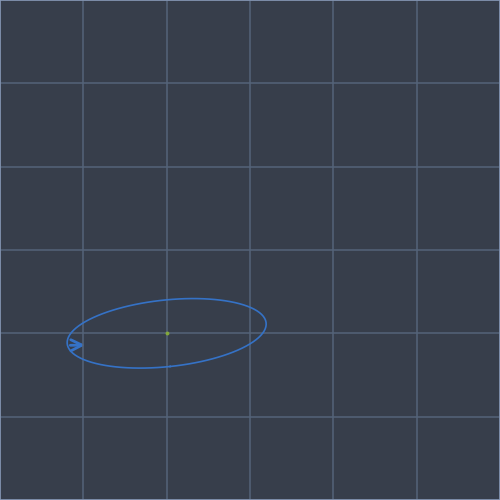

In [13]:
t = np.linspace(0,20,10)
alpha = np.pi/150 #[rad/s]
omega0 = np.pi/100
fig = plt.figure()
plt.grid()
ax = fig.add_axes([0, 0, 1, 1])    
ax.axis("on")
plt.rcParams['figure.figsize']=5,5
theta = 0
omega = 0
def run(i):
    omega = alpha*t[i]+omega0
    theta = alpha/2*t[i]**2 + omega0*t[i]
    aoa = np.array([[0.0],[0.0]])
    voa = aoa*t[i]
    roa = aoa/2*t[i]**2
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    T = np.vstack((np.hstack((R,roa)), np.array([0,0,1])))
    BRot = R@B
    BRotTr = T@Baum   
    
    
    
    plt.plot(BRotTr[0,:],BRotTr[1,:], roa[0], roa[1],'.', hold = False)
    vVoa = FancyArrowPatch(np.array([float(roa[0]), float(roa[1])]), 
                           3*np.array([float(roa[0]+voa[0]), 
                                       float(roa[1]+voa[1])]), mutation_scale=20, 
                           lw=2, arrowstyle="->", color="r", alpha=1)
    ax.add_artist(vVoa)
    
    #plt.plot(BRotTr[0,:],BRotTr[1,:], roa[0], roa[1],'.', hold = False)
    
    element = 75
    ap = np.array([aoa[0] - alpha*BRot[1,element] - omega**2*BRot[0,element],
                   aoa[1] + alpha*BRot[0,element] - omega**2*BRot[1,element]])
    vVP = FancyArrowPatch(np.array([float(BRotTr[0,element]), float(BRotTr[1,element])]), 
                          np.array([float(BRotTr[0,element]+ap[0]), 
                                      float(BRotTr[1,element]+ap[1])]),
                          mutation_scale=20, 
                          lw=2, arrowstyle="->", color="b", alpha=1)
    ax.add_artist(vVP)
    
    plt.xlim((-10, 20))
    plt.ylim((-10, 20))
       
    

ani = FuncAnimation(fig, run, frames = 50,repeat=False,  interval =500)
plt.show()


## Problems

1. Solve the problems 15.1.5, 15.1.7, 15.1.8, 15.2.5, 15.2.10, 15.2.11 and 15.2.20 from Ruina and Rudra's book.
2. Solve the problems 16.1.2, 16.1.8, 16.1.9, 16.1.10, 16.1.11 and 16.1.12 from Ruina and Rudra's book.
